<a href="https://colab.research.google.com/github/Judyxyang/Industrial_components_Classification/blob/main/RFI_Selection_%2B_KNN_UNSW_NB15_KNN_Test_Data_for_Conference_paper_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [22]:
from pandas.plotting import scatter_matrix
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#knn = KNeighborsClassifier(n_neighbors=2)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/MyDrive/ConferenceGriffith'

'35 Feature Importance List .csv'
'Complete coding for Conference_KNN_10052021.ipynb'
'Complete coding for Conference_KNN_12052021.ipynb'
'download (1).png'
'download (2).png'
 download.png
'Processed Complete PCA and Anormal &Normal PCA12052021.ipynb'
'Processed UNSW-NB15_PCA_Normal_Anormal Analysis_12052021.ipynb'
'Score95_UNSW-NB15 Complete PCA KNN Test Data for Conference paper .ipynb'
'UNSW-NB15-1.csv-Complete Data Preprocessing to PCA _13052021.ipynb'
 UNSW-NB15_1N_40F.csv
 UNSW-NB15_1NN_10F_OneHot.csv
 UNSW-NB15_1NN_12F_OneHot.csv
 UNSW-NB15_1NN_15F_OneHot.csv
 UNSW-NB15_1NN_20F_OneHot.csv
 UNSW-NB15_1NN_30F_Anormalwith10targets_OneHot.csv
 UNSW-NB15_1NN_30Fnew.csv
 UNSW-NB15_1NN_30F_Normalwith10targets_OneHot.csv
 UNSW-NB15_1NN_30F_OneHot_targets.csv
 UNSW-NB15_1NN_35F_OneHot.csv
 UNSW-NB15_1NN_35F_OneHot_targets.csv
 UNSW-NB15_1NN_40F_OneHot.csv
 UNSW-NB15_1NN_41F.csv
 UNSW-NB15_1NN_50F_OneHote.csv
 UNSW-NB15_1NN_50_OneHot.csv
 UNSW-NB15_1NN_5F_OneHot.csv
 UNSW-NB15_1NN_8F_One

In [4]:
# load sklearn dataset
data=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_50_OneHot.csv', low_memory=False)

In [5]:
data.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Normal,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms,Label
0,0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0
1,1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0
2,2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
4,4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,4,4,0,0,0,0,142,78,0,0,29.682221,34.370340,1421927414,1421927414,21.003,24.315000,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0


In [6]:
data=data.drop(['Unnamed: 0'],axis=1)

In [7]:
data.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal',
       ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic',
       'Reconnaissance', 'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [8]:
#Select the first 40 columns as features 
X=data.iloc[:,:40]
#Slecte the 41-50 columns as targets 
y1=data.iloc[:,40:50]
y2=data.iloc[:,50:51]

In [9]:
X.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'],
      dtype='object')

In [10]:
y1.columns

Index(['Normal', ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [11]:
y2.columns

Index(['Label'], dtype='object')

#Feature Selection -1 Random Forest Importance

In [12]:
#Random Forest Importance 
# Decision tree from feature importance on a classification problem

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y2 = make_classification(
    n_samples=700000, n_features=40, n_informative=20, n_redundant=0, 
    n_repeated=0, n_classes=2, random_state=0, shuffle=False)
X_train, X_test, y2_train, y2_test = train_test_split(
    X, y2, stratify=y2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Feature importance based on mean decrease in impurity¶

In [24]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.126 seconds


Let’s plot the impurity-based importance.

<Figure size 5760x1080 with 0 Axes>

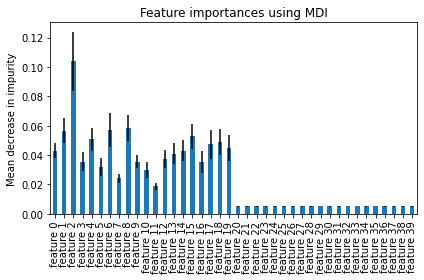

In [91]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)
plt.figure(figsize=(80,15))

fig, ax = plt.subplots()
#fig, ax = plt.plot()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature importance based on feature permutation

In [25]:
data.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal',
       ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic',
       'Reconnaissance', 'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [ ]:
from matplotlib.pyplot import MultipleLocator

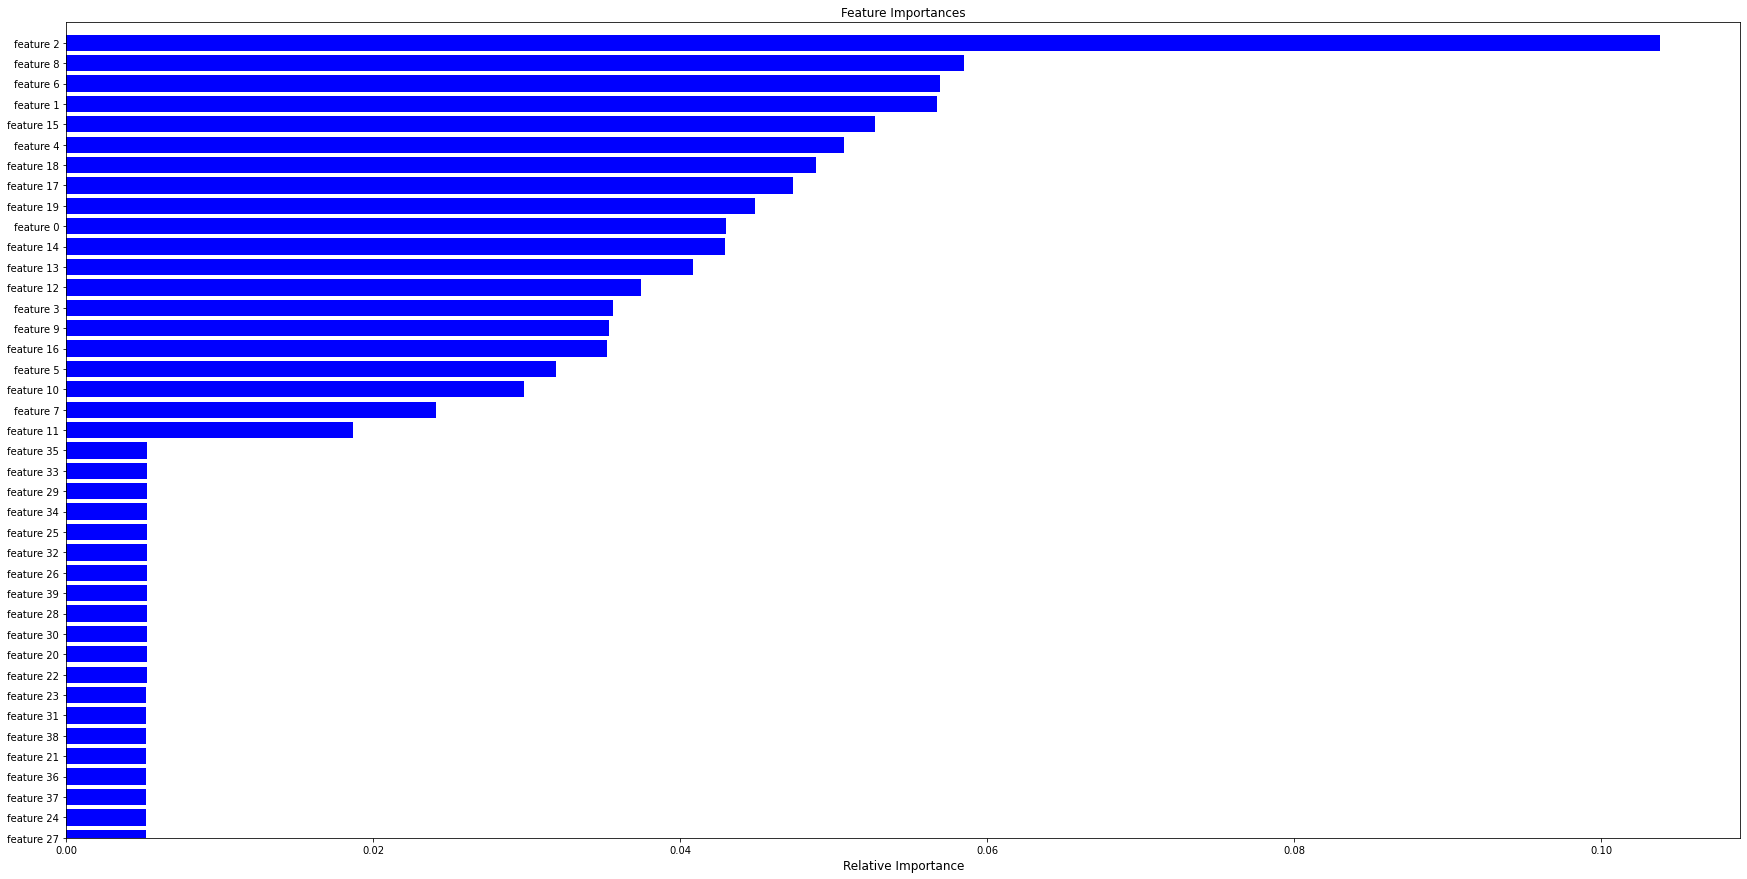

In [36]:
features = feature_names
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(30,15))

plt.title('Feature Importances',fontsize=12)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)))
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylim(0, 40)
plt.xlabel('Relative Importance', fontsize=12)
plt.show()

In [37]:
importances[indices]

array([0.00516611, 0.00518539, 0.00518954, 0.00519   , 0.00520259,
       0.00520513, 0.00521617, 0.00522921, 0.00523164, 0.0052349 ,
       0.0052351 , 0.00524039, 0.00526598, 0.00527039, 0.00527663,
       0.00527765, 0.00528256, 0.00528822, 0.00529177, 0.00529526,
       0.01867842, 0.02407086, 0.02980996, 0.03190199, 0.03523432,
       0.0353843 , 0.0356016 , 0.03744891, 0.04079835, 0.04292009,
       0.04296093, 0.04489316, 0.04731885, 0.04886046, 0.05066787,
       0.05269518, 0.05670805, 0.05694029, 0.05848949, 0.1038423 ])

In [38]:
indices

array([27, 24, 37, 36, 21, 38, 31, 23, 22, 20, 30, 28, 39, 26, 32, 25, 34,
       29, 33, 35, 11,  7, 10,  5, 16,  9,  3, 12, 13, 14,  0, 19, 17, 18,
        4, 15,  1,  6,  8,  2])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 51 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dur               700000 non-null  float64
 1   sbytes            700000 non-null  int64  
 2   dbytes            700000 non-null  int64  
 3   sttl              700000 non-null  int64  
 4   dttl              700000 non-null  int64  
 5   sloss             700000 non-null  int64  
 6   dloss             700000 non-null  int64  
 7   Sload             700000 non-null  float64
 8   Dload             700000 non-null  float64
 9   Spkts             700000 non-null  int64  
 10  Dpkts             700000 non-null  int64  
 11  swin              700000 non-null  int64  
 12  dwin              700000 non-null  int64  
 13  stcpb             700000 non-null  int64  
 14  dtcpb             700000 non-null  int64  
 15  smeansz           700000 non-null  int64  
 16  dmeansz           70

In [40]:
data.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal',
       ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic',
       'Reconnaissance', 'Shellcode', 'Worms', 'Label'],
      dtype='object')

# Save 20 Features Files to the folder

In [116]:
data_20=data.drop(['Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'], axis=1)

In [117]:
data_20=data_20.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_20F_OneHot.csv')

In [17]:
data_20=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_20F_OneHot.csv',low_memory=False)

In [18]:
data_20.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit',
       'Normal', ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [19]:
df=data_20.drop(['Unnamed: 0'],axis=1)


In [20]:
df.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Normal', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [41]:
df.shape

(700000, 31)

In [42]:
#700000 Lines Data Set 
#Select the first 20 columns as features 
X=df.iloc[:,0:20]
#Slecte the 42 as targets 
y1=df.iloc[:,20:30]
y2=df.iloc[:,30:31]

In [43]:
X, y2, y1

(             dur  sbytes   dbytes  ...  trans_depth  res_bdy_len        Sjit
 0       0.036133     528      304  ...            0            0    9.891010
 1       0.001119     146      178  ...            0            0    0.000000
 2       0.001209     132      164  ...            0            0    0.000000
 3       0.001169     146      178  ...            0            0    0.000000
 4       0.078339     568      312  ...            0            0   29.682221
 ...          ...     ...      ...  ...          ...          ...         ...
 699995  0.020383     320     1874  ...            0            0  212.810729
 699996  1.402957   19410  1087890  ...            1         3924  203.808900
 699997  0.007108    2158     2464  ...            0            0   17.627831
 699998  0.004435     568      304  ...            0            0    1.638604
 699999  0.072974    4238    60788  ...            0            0   62.045310
 
 [700000 rows x 20 columns],         Label
 0           0
 1  

In [44]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
knn_2= KNeighborsClassifier(n_neighbors=2)

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X, y2, random_state=0)

In [278]:
knn_2.fit(X_train, y_train)
y_pred=knn_2.predict(X_test)
print(accuracy_score(y_test, y_pred))
#print("Test set predictions:\n", y_pred)
#print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9947771428571428
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173619
           1       0.78      0.47      0.59      1381

    accuracy                           0.99    175000
   macro avg       0.89      0.73      0.79    175000
weighted avg       0.99      0.99      0.99    175000

[[173440    179]
 [   735    646]]


# MUltiCategory Classficiation

In [184]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=10)

In [185]:
y1.shape

(700000, 10)

In [186]:
X=np.array(X)


In [187]:
#Standardizing the features
X=StandardScaler().fit_transform(X)


In [188]:
X_train, X_test, y1_train, y1_test=train_test_split(X, y1, random_state=0)

In [189]:
knn.fit(X_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [190]:
#knn_1.fit(X_train, y1_train)
y1_pred=knn.predict(X_test)
#print(accuracy_score(y1_test, y1_pred))
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y1_pred==y1_test])))
print(classification_report(y1_test, y1_pred))
#print(confusion_matrix(y1_test, y1_pred))

Test set predictions:
 [0 0 0 ... 0 0 0]
Test score:0.9977
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.56      0.21      0.31      1354
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       133
           4       0.44      0.04      0.07       278
           5       0.82      0.50      0.62      1381
           6       0.99      0.93      0.96      1875
           7       0.81      0.52      0.63       438
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         6

   micro avg       1.00      0.98      0.99    175000
   macro avg       0.46      0.32      0.36    175000
weighted avg       0.99      0.98      0.98    175000
 samples avg       0.98      0.98      0.98    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 15, 12, 10, 9, 8, 5 Feature Dataset KNN Test 

In [191]:
data_15=data_20.drop(['sloss','Sload','Dpkts','swin','dmeansz'],axis=1)

In [201]:
data_15.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'dloss',
       'Dload', 'Spkts', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'trans_depth',
       'res_bdy_len', 'Sjit', 'Normal', ' Fuzzers', 'Analysis', 'Backdoors',
       'DoS', 'Exploits', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms',
       'Label'],
      dtype='object')

In [202]:
data_15=data_15.drop(['Unnamed: 0'],axis=1)

In [203]:
data_15=data_15.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_15F_OneHot.csv')

In [47]:
data_15=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_15F_OneHot.csv',low_memory=False)

In [48]:
data_15.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'dloss',
       'Dload', 'Spkts', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'trans_depth',
       'res_bdy_len', 'Sjit', 'Normal', ' Fuzzers', 'Analysis', 'Backdoors',
       'DoS', 'Exploits', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms',
       'Label'],
      dtype='object')

In [49]:
data_15=data_15.drop(['Unnamed: 0'],axis=1)

In [50]:
data_15.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'dloss', 'Dload', 'Spkts',
       'dwin', 'stcpb', 'dtcpb', 'smeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Normal', ' Fuzzers', 'Analysis', 'Backdoors', 'DoS',
       'Exploits', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [208]:
data_12=data_15.drop(['sttl','Spkts','dwin'],axis=1)

In [209]:
data_12=data_12.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_12F_OneHot.csv')

In [51]:
data_12=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_12F_OneHot.csv',low_memory=False)

In [52]:
data_12.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'dttl', 'dloss', 'Dload',
       'stcpb', 'dtcpb', 'smeansz', 'trans_depth', 'res_bdy_len', 'Sjit',
       'Normal', ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [53]:
data_12=data_12.drop(['Unnamed: 0'],axis=1)

In [54]:
data_10=data_12.drop(['stcpb','dtcpb'],axis=1)

In [214]:
data_10=data_10.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_10F_OneHot.csv')

In [55]:
data_10=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_10F_OneHot.csv',low_memory=False)

In [56]:
data_10.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'dttl', 'dloss', 'Dload',
       'smeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Normal', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [57]:
data_10=data_10.drop(['Unnamed: 0'],axis=1)

In [58]:
data_9=data_10.drop(['sbytes'],axis=1)

In [220]:
data_9=data_9.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_9F_OneHot.csv')

In [59]:
data_9=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_9F_OneHot.csv',low_memory=False)

In [60]:
data_9.columns

Index(['Unnamed: 0', 'dur', 'dbytes', 'dttl', 'dloss', 'Dload', 'smeansz',
       'trans_depth', 'res_bdy_len', 'Sjit', 'Normal', ' Fuzzers', 'Analysis',
       'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [61]:
data_9=data_9.drop(['Unnamed: 0'],axis=1)

In [62]:
data_8=data_9.drop(['Sjit'],axis=1)

In [225]:
data_8=data_8.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_8F_OneHot.csv')

In [63]:
data_8=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_8F_OneHot.csv',low_memory=False)

In [64]:
data_8.columns

Index(['Unnamed: 0', 'dur', 'dbytes', 'dttl', 'dloss', 'Dload', 'smeansz',
       'trans_depth', 'res_bdy_len', 'Normal', ' Fuzzers', 'Analysis',
       'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [65]:
data_8=data_8.drop(['Unnamed: 0'],axis=1)

In [229]:
data_5=data_8.drop(['dttl','trans_depth', 'res_bdy_len'],axis=1)

In [231]:
data_5=data_5.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_5F_OneHot.csv')

In [66]:
data_5=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_5F_OneHot.csv',low_memory=False)

In [67]:
data_5.columns

Index(['Unnamed: 0', 'dur', 'dbytes', 'dloss', 'Dload', 'smeansz', 'Normal',
       ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic',
       'Reconnaissance', 'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [68]:
data_5=data_5.drop(['Unnamed: 0'],axis=1)

In [69]:
#700000 Lines Data Set  for 15 features
#Select the first 20 columns as features 
X_15=data_15.iloc[:,0:15]
#Slecte the 42 as targets 
y_15_1=data_15.iloc[:,15:25]
y_15_2=data_15.iloc[:,25:26]

In [70]:
X_15.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'dloss', 'Dload', 'Spkts',
       'dwin', 'stcpb', 'dtcpb', 'smeansz', 'trans_depth', 'res_bdy_len',
       'Sjit'],
      dtype='object')

In [71]:
y_15_1.columns

Index(['Normal', ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [72]:
y_15_2.columns

Index(['Label'], dtype='object')

In [73]:
#700000 Lines Data Set  for 12 features
#Select the first 12 columns as features 
X_12=data_12.iloc[:,0:12]
#Slecte the 42 as targets 
y_12_1=data_12.iloc[:,12:22]
y_12_2=data_12.iloc[:,22:23]

In [74]:
#700000 Lines Data Set  for 10 features
#Select the first 10 columns as features 
X_10=data_10.iloc[:,0:10]
#Slecte the 42 as targets 
y_10_1=data_10.iloc[:,10:20]
y_10_2=data_10.iloc[:,20:21]

In [76]:
#700000 Lines Data Set  for 9 features
#Select the first 9 columns as features 
X_9=data_9.iloc[:,0:9]
#Slecte the 42 as targets 
y_9_1=data_9.iloc[:,9:19]
y_9_2=data_9.iloc[:,19:20]

In [77]:
#700000 Lines Data Set  for 8 features
#Select the first 8 columns as features 
X_8=data_8.iloc[:,0:8]
#Slecte the 42 as targets 
y_8_1=data_8.iloc[:,8:18]
y_8_2=data_8.iloc[:,18:19]

In [78]:
#700000 Lines Data Set  for 5 features
#Select the first 5 columns as features 
X_5=data_5.iloc[:,0:5]
#Slecte the 42 as targets 
y_5_1=data_5.iloc[:,5:15]
y_5_2=data_5.iloc[:,15:16]

# KNN Binary Test for different features 

In [266]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
knn_2= KNeighborsClassifier(n_neighbors=2)

In [271]:
y_15_2.shape

(700000, 1)

In [272]:
#Standardizing the features
X_15=np.array(X_15)
X_15=StandardScaler().fit_transform(X_15)

In [275]:
X_15_train, X_15_test, y_15_2_train, y_15_2_test=train_test_split(X_15, y_15_2, random_state=0)
knn_2.fit(X_15_train, y_15_2_train)
y_15_2_pred=knn_2.predict(X_15_test)
print(accuracy_score(y_15_2_test, y_15_2_pred))
#print("Test set predictions:\n", y_pred)
#print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_15_2_test, y_15_2_pred))
print(confusion_matrix(y_15_2_test, y_15_2_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9928514285714286
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    169339
           1       0.94      0.84      0.88      5661

    accuracy                           0.99    175000
   macro avg       0.97      0.92      0.94    175000
weighted avg       0.99      0.99      0.99    175000

[[169021    318]
 [   933   4728]]


In [279]:
#Standardizing the features
X_12=np.array(X_12)
X_12=StandardScaler().fit_transform(X_12)

X_12_train, X_12_test, y_12_2_train, y_12_2_test=train_test_split(X_12, y_12_2, random_state=0)
knn_2.fit(X_12_train, y_12_2_train)
y_12_2_pred=knn_2.predict(X_12_test)
print(accuracy_score(y_12_2_test, y_12_2_pred))
#print("Test set predictions:\n", y_pred)
#print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_12_2_test, y_12_2_pred))
print(confusion_matrix(y_12_2_test, y_12_2_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9916228571428571
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    169339
           1       0.94      0.80      0.86      5661

    accuracy                           0.99    175000
   macro avg       0.96      0.90      0.93    175000
weighted avg       0.99      0.99      0.99    175000

[[169027    312]
 [  1154   4507]]


In [280]:
#Standardizing the 10 features
X_10=np.array(X_10)
X_10=StandardScaler().fit_transform(X_10)

X_10_train, X_10_test, y_10_2_train, y_10_2_test=train_test_split(X_10, y_10_2, random_state=0)
knn_2.fit(X_10_train, y_10_2_train)
y_10_2_pred=knn_2.predict(X_10_test)
print(accuracy_score(y_10_2_test, y_10_2_pred))
#print("Test set predictions:\n", y_pred)
#print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_10_2_test, y_10_2_pred))
print(confusion_matrix(y_10_2_test, y_10_2_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9940628571428571
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.96      0.86      0.90      5661

    accuracy                           0.99    175000
   macro avg       0.98      0.93      0.95    175000
weighted avg       0.99      0.99      0.99    175000

[[169116    223]
 [   816   4845]]


In [281]:
#Standardizing the 9 features
X_9=np.array(X_9)
X_9=StandardScaler().fit_transform(X_9)

X_9_train, X_9_test, y_9_2_train, y_9_2_test=train_test_split(X_9, y_9_2, random_state=0)
knn_2.fit(X_9_train, y_9_2_train)
y_9_2_pred=knn_2.predict(X_9_test)
print(accuracy_score(y_9_2_test, y_9_2_pred))
#print("Test set predictions:\n", y_pred)
#print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_9_2_test, y_9_2_pred))
print(confusion_matrix(y_9_2_test, y_9_2_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9939314285714286
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.96      0.85      0.90      5661

    accuracy                           0.99    175000
   macro avg       0.98      0.93      0.95    175000
weighted avg       0.99      0.99      0.99    175000

[[169114    225]
 [   837   4824]]


In [284]:
#Standardizing the 8 features
X_8=np.array(X_8)
X_8=StandardScaler().fit_transform(X_8)

X_8_train, X_8_test, y_8_2_train, y_8_2_test=train_test_split(X_8, y_8_2, random_state=0)
knn_2.fit(X_8_train, y_8_2_train)
y_8_2_pred=knn_2.predict(X_8_test)
print(accuracy_score(y_8_2_test, y_8_2_pred))
#print("Test set predictions:\n", y_pred)
#print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_8_2_test, y_8_2_pred))
print(confusion_matrix(y_8_2_test, y_8_2_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9950342857142858
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.96      0.88      0.92      5661

    accuracy                           1.00    175000
   macro avg       0.98      0.94      0.96    175000
weighted avg       0.99      1.00      0.99    175000

[[169124    215]
 [   654   5007]]


In [283]:
#Standardizing the 5 features
X_5=np.array(X_5)
X_5=StandardScaler().fit_transform(X_5)

X_5_train, X_5_test, y_5_2_train, y_5_2_test=train_test_split(X_5, y_5_2, random_state=0)
knn_2.fit(X_5_train, y_5_2_train)
y_5_2_pred=knn_2.predict(X_5_test)
print(accuracy_score(y_5_2_test, y_5_2_pred))
#print("Test set predictions:\n", y_pred)
#print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_5_2_test, y_5_2_pred))
print(confusion_matrix(y_5_2_test, y_5_2_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9931314285714286
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    169339
           1       0.95      0.83      0.89      5661

    accuracy                           0.99    175000
   macro avg       0.97      0.92      0.94    175000
weighted avg       0.99      0.99      0.99    175000

[[169088    251]
 [   951   4710]]


# Multi Tasks KNN Test 

In [79]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
knn_1 = KNeighborsClassifier(n_neighbors=10)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [81]:
#Standardizing the 15 features
X_15=np.array(X_15)
X_15=StandardScaler().fit_transform(X_15)


X_15_train, X_15_test, y_15_1_train, y_15_1_test=train_test_split(X_15, y_15_1, random_state=0)
knn_1.fit(X_15_train, y_15_1_train)
y_15_1_pred=knn_1.predict(X_15_test)

#print(accuracy_score(y_15_1_test, y_15_1_pred))
print("Test set predictions:\n", y_15_1_pred)
print("Test score:{:.4f}".format(np.mean([y_15_1_pred==y_15_1_test])))
print(classification_report(y_15_1_test, y_15_1_pred))
#print(confusion_matrix(y1_test, y1_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9976
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.56      0.22      0.31      1354
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       133
           4       0.39      0.05      0.08       278
           5       0.77      0.48      0.59      1381
           6       1.00      0.93      0.96      1875
           7       0.83      0.50      0.63       438
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         6

   micro avg       1.00      0.98      0.99    175000
   macro avg       0.46      0.32      0.36    175000
weighted avg       0.99      0.98      0.98    175000
 samples avg       0.98      0.98      0.98    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
#Standardizing the 12 features
X_12=np.array(X_12)
X_12=StandardScaler().fit_transform(X_12)


X_12_train, X_12_test, y_12_1_train, y_12_1_test=train_test_split(X_12, y_12_1, random_state=0)
knn_1.fit(X_12_train, y_12_1_train)
y_12_1_pred=knn_1.predict(X_12_test)

#print(accuracy_score(y_15_1_test, y_15_1_pred))
print("Test set predictions:\n", y_12_1_pred)
print("Test score:{:.4f}".format(np.mean([y_12_1_pred==y_12_1_test])))
print(classification_report(y_12_1_test, y_12_1_pred))
#print(confusion_matrix(y1_test, y1_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.54      0.15      0.24      1354
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       133
           4       0.37      0.03      0.05       278
           5       0.70      0.30      0.42      1381
           6       1.00      0.93      0.96      1875
           7       0.88      0.47      0.61       438
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         6

   micro avg       1.00      0.98      0.99    175000
   macro avg       0.45      0.29      0.33    175000
weighted avg       0.99      0.98      0.98    175000
 samples avg       0.98      0.98      0.98    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#Standardizing the 10 features
X_10=np.array(X_10)
X_10=StandardScaler().fit_transform(X_10)


X_10_train, X_10_test, y_10_1_train, y_10_1_test=train_test_split(X_10, y_10_1, random_state=0)
knn_1.fit(X_10_train, y_10_1_train)
y_10_1_pred=knn_1.predict(X_10_test)

#print(accuracy_score(y_15_1_test, y_15_1_pred))
print("Test set predictions:\n", y_10_1_pred)
print("Test score:{:.4f}".format(np.mean([y_10_1_pred==y_10_1_test])))
print(classification_report(y_10_1_test, y_10_1_pred))
#print(confusion_matrix(y1_test, y1_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.63      0.32      0.43      1354
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       133
           4       0.44      0.03      0.05       278
           5       0.82      0.53      0.64      1381
           6       0.99      0.94      0.96      1875
           7       0.91      0.78      0.84       438
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         6

   micro avg       1.00      0.98      0.99    175000
   macro avg       0.48      0.36      0.39    175000
weighted avg       0.99      0.98      0.99    175000
 samples avg       0.98      0.98      0.98    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
#Standardizing the 9 features
X_9=np.array(X_9)
X_9=StandardScaler().fit_transform(X_9)


X_9_train, X_9_test, y_9_1_train, y_9_1_test=train_test_split(X_9, y_9_1, random_state=0)
knn_1.fit(X_9_train, y_9_1_train)
y_9_1_pred=knn_1.predict(X_9_test)

#print(accuracy_score(y_15_1_test, y_15_1_pred))
print("Test set predictions:\n", y_9_1_pred)
print("Test score:{:.4f}".format(np.mean([y_9_1_pred==y_9_1_test])))
print(classification_report(y_9_1_test, y_9_1_pred))
#print(confusion_matrix(y1_test, y1_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.62      0.32      0.42      1354
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       133
           4       0.31      0.01      0.03       278
           5       0.81      0.53      0.64      1381
           6       0.99      0.94      0.96      1875
           7       0.91      0.78      0.84       438
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         6

   micro avg       1.00      0.98      0.99    175000
   macro avg       0.46      0.36      0.39    175000
weighted avg       0.99      0.98      0.99    175000
 samples avg       0.98      0.98      0.98    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#Standardizing the 8 features
X_8=np.array(X_8)
X_8=StandardScaler().fit_transform(X_8)


X_8_train, X_8_test, y_8_1_train, y_8_1_test=train_test_split(X_8, y_8_1, random_state=0)
knn_1.fit(X_8_train, y_8_1_train)
y_8_1_pred=knn_1.predict(X_8_test)

#print(accuracy_score(y_15_1_test, y_15_1_pred))
print("Test set predictions:\n", y_8_1_pred)
print("Test score:{:.4f}".format(np.mean([y_8_1_pred==y_8_1_test])))
print(classification_report(y_8_1_test, y_8_1_pred))
#print(confusion_matrix(y1_test, y1_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9980
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.67      0.38      0.49      1354
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       133
           4       0.38      0.05      0.09       278
           5       0.82      0.56      0.67      1381
           6       0.99      0.94      0.97      1875
           7       0.92      0.82      0.87       438
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00         6

   micro avg       1.00      0.98      0.99    175000
   macro avg       0.48      0.37      0.41    175000
weighted avg       0.99      0.98      0.99    175000
 samples avg       0.98      0.98      0.98    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
#Standardizing the 5 features
X_5=np.array(X_5)
X_5=StandardScaler().fit_transform(X_5)


X_5_train, X_5_test, y_5_1_train, y_5_1_test=train_test_split(X_5, y_5_1, random_state=0)
knn_1.fit(X_5_train, y_5_1_train)
y_5_1_pred=knn_1.predict(X_5_test)

#print(accuracy_score(y_15_1_test, y_15_1_pred))
print("Test set predictions:\n", y_5_1_pred)
print("Test score:{:.4f}".format(np.mean([y_5_1_pred==y_5_1_test])))
print(classification_report(y_5_1_test, y_5_1_pred))
#print(confusion_matrix(y1_test, y1_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9977
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169339
           1       0.68      0.36      0.47      1354
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       133
           4       0.32      0.04      0.07       278
           5       0.82      0.41      0.55      1381
           6       1.00      0.94      0.97      1875
           7       0.92      0.80      0.86       438
           8       0.00      0.00      0.00        57
           9       0.25      0.17      0.20         6

   micro avg       0.99      0.98      0.99    175000
   macro avg       0.50      0.37      0.41    175000
weighted avg       0.99      0.98      0.98    175000
 samples avg       0.98      0.98      0.98    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
